In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("datos/covid_data.csv")
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251577,ZWE,Africa,Zimbabwe,2023-01-16,259981.0,0.0,0.0,5637.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
251578,ZWE,Africa,Zimbabwe,2023-01-17,259981.0,0.0,0.0,5637.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
251579,ZWE,Africa,Zimbabwe,2023-01-18,259981.0,0.0,0.0,5637.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
251580,ZWE,Africa,Zimbabwe,2023-01-19,259981.0,0.0,0.0,5637.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [3]:
agrupado = df[["date", "continent", "new_cases"]].groupby(["date", "continent"]).sum()
agrupado

new_cases
date       continent               
2020-01-01 North America        0.0
           South America        0.0
2020-01-02 North America        0.0
           South America        0.0
2020-01-03 North America        0.0
...                             ...
2023-01-20 Asia            134312.0
           Europe           93741.0
           North America    62508.0
           Oceania           8906.0
           South America    43411.0

[6610 rows x 1 columns]

In [4]:
agrupado = agrupado.unstack(1)
agrupado

new_cases                                                        
continent     Africa      Asia   Europe North America  Oceania South America
date                                                                        
2020-01-01       NaN       NaN      NaN           0.0      NaN           0.0
2020-01-02       NaN       NaN      NaN           0.0      NaN           0.0
2020-01-03       NaN       NaN      NaN           0.0      NaN           0.0
2020-01-04       NaN       0.0      NaN           0.0      NaN           0.0
2020-01-05       NaN       0.0      NaN           0.0      NaN           0.0
...              ...       ...      ...           ...      ...           ...
2023-01-16    1002.0  118153.0  37669.0        9813.0     11.0       46261.0
2023-01-17    3922.0  197154.0  38267.0       83173.0      3.0       27680.0
2023-01-18    1321.0  185432.0  32177.0      136071.0     63.0       21720.0
2023-01-19     924.0  149209.0  52560.0       96365.0  18062.0        5223.0
2023-01-20     585.0  134312.0  93741.0       62508.0   8906.0       43411.0

[1116 rows x 6 columns]

In [5]:
agrupado = agrupado.fillna(0)
agrupado

new_cases                                                        
continent     Africa      Asia   Europe North America  Oceania South America
date                                                                        
2020-01-01       0.0       0.0      0.0           0.0      0.0           0.0
2020-01-02       0.0       0.0      0.0           0.0      0.0           0.0
2020-01-03       0.0       0.0      0.0           0.0      0.0           0.0
2020-01-04       0.0       0.0      0.0           0.0      0.0           0.0
2020-01-05       0.0       0.0      0.0           0.0      0.0           0.0
...              ...       ...      ...           ...      ...           ...
2023-01-16    1002.0  118153.0  37669.0        9813.0     11.0       46261.0
2023-01-17    3922.0  197154.0  38267.0       83173.0      3.0       27680.0
2023-01-18    1321.0  185432.0  32177.0      136071.0     63.0       21720.0
2023-01-19     924.0  149209.0  52560.0       96365.0  18062.0        5223.0
2023-01-20     585.0  134312.0  93741.0       62508.0   8906.0       43411.0

[1116 rows x 6 columns]

In [6]:
agrupado = agrupado.droplevel(0, axis=1)
agrupado

continent,Africa,Asia,Europe,North America,Oceania,South America
date,,,,,,
2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2023-01-16,1002.0,118153.0,37669.0,9813.0,11.0,46261.0
2023-01-17,3922.0,197154.0,38267.0,83173.0,3.0,27680.0
2023-01-18,1321.0,185432.0,32177.0,136071.0,63.0,21720.0


In [7]:
values = [
    agrupado["Africa"],
    agrupado["Asia"],
    agrupado["Europe"],
    agrupado["North America"],
    agrupado["Oceania"],
    agrupado["South America"]
]

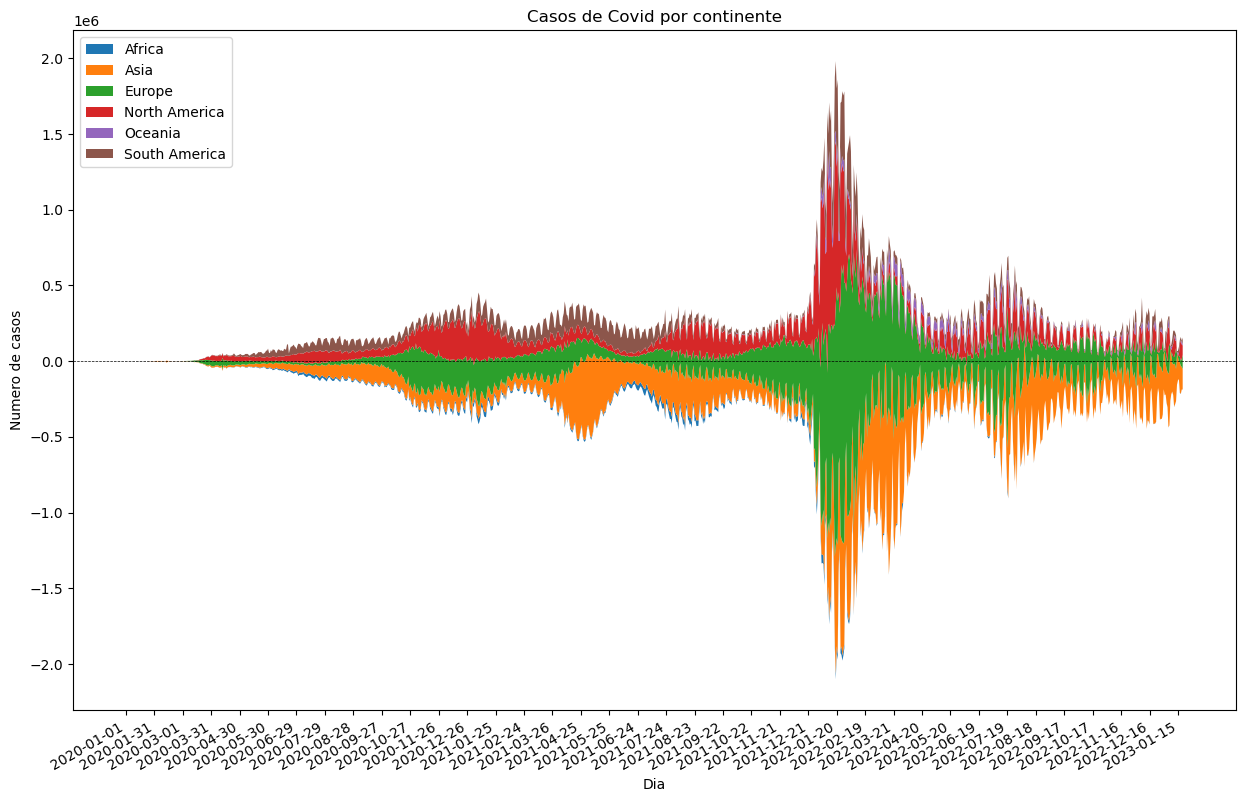

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ax.stackplot(
    agrupado.index.values,
    values,
    baseline="wiggle",
    labels=agrupado.columns.values
)

ax.legend(loc="upper left")
ax.set_title("Casos de Covid por continente")
ax.set_ylabel("Numero de casos")
ax.set_xlabel("Dia")
ax.axhline(0, color="black", ls="--", linewidth=0.5)

fig.autofmt_xdate()
plt.xticks(np.arange(0, len(agrupado.index.values), 30))

plt.show()